In [1]:
import pandas as pd
from tqdm import tqdm
import awkward as ak
import numpy as np
import datetime as dt
import os
import json
import pickle
import glob
import time

from scipy.optimize import curve_fit
from scipy.special import erfc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from legendmeta import LegendMetadata



In [9]:
save_figures = True

# Update matplotlib parameters for consistent styling
plt.rcParams.update({
    "figure.figsize": (8,4),
    "lines.linewidth": 1,
    "image.cmap": "magma",
    "font.size": 17
})

base_path = "/global/cfs/projectdirs/m2676/users/yuvand/Final_Analysis/Sensitivity/Sens_new/"

In [14]:
import json

# Define all files in a dictionary
files = {
    "results_aoe": os.path.join(base_path, "AoE_floating_1000kgyr_new/summary.json"),
    "results_t1": os.path.join(base_path, "T1_floating_1000kgyr_new/summary.json"),
    "events_aoe": os.path.join(base_path, "AoE_floating_1000kgyr_new/summary_evts.json"),
    "events_t1": os.path.join(base_path, "T1_floating_1000kgyr_new/summary_evts.json")
}

# Load them into a dictionary
data = {}
for key, path in files.items():
    with open(path, "r") as f:
        data[key] = json.load(f)

results_aoe = data["results_aoe"]
results_t1  = data["results_t1"]
events_aoe  = data["events_aoe"]
events_t1   = data["events_t1"]

In [21]:
with open("/global/cfs/projectdirs/m2676/users/yuvand/Final_Analysis/Sensitivity/Sens_new/summaryTEST.json", "r") as f:
    data = json.load(f)

In [20]:
os.listdir('/global/cfs/projectdirs/m2676/users/yuvand/Final_Analysis/Sensitivity/Sens_new')

['T1_floating_1000kgyr_new', 'AoE_floating_1000kgyr_new']

In [46]:
np.max(data['AoE_floating_1000kgyr_new']['roi_count'])

np.int64(3)

In [ ]:
for label in ['0', '1', '2', '3+', 'All']:
    plt.hist(
        data['AoE_floating_1000kgyr_new']['roi_count'],
        bins=bins,
        alpha=0.6 if label != 'All' else 0.2,
        label=rf"Toys w. {label} cts. in $Q_{{\beta \beta}} \pm $ FWHM" if label != 'All' else 'All',
        color=colors[label],
        histtype='step' if label != 'All' else 'stepfilled',
        linewidth=1.7
    )

In [50]:
data[data['AoE_floating_1000kgyr_new']['roi_count'] == 0]

KeyError: False

{0: [5.023780952564437e-31],
 1: [8.393850671086441e-29],
 2: [3.4998392534155994e-28],
 3: [5.298688438752774e-28]}

In [60]:
s_groups = {}
for i in data['AoE_floating_1000kgyr_new']['roi_count']:
    s_groups[i] = []


for s, cat in zip(data['AoE_floating_1000kgyr_new']['global_mode_S'], data['AoE_floating_1000kgyr_new']['roi_count']):
    s_groups[cat].append(s)

s_groups['All'] = data['AoE_floating_1000kgyr_new']['global_mode_S']

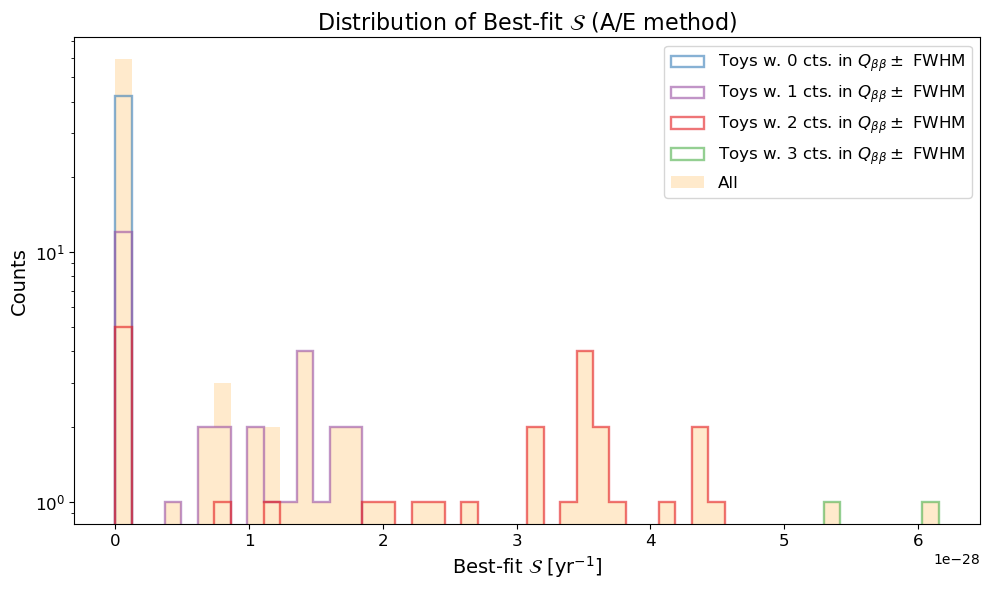

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# --- Bin edges based on full distribution ---
bins = np.histogram_bin_edges(data['AoE_floating_1000kgyr_new']['global_mode_S'], bins=50)

# --- Define colors (colorblind-friendly) ---
colors = {
    0: '#377eb8',    # blue
    1: '#984ea3',    # purple
    2: '#e41a1c',    # red
    3: '#4daf4a',   # green
    'All': "#ff9900"
}

# --- Plot ---
plt.figure(figsize=(10, 6))

for label in s_groups.keys():
    plt.hist(
        s_groups[label],
        bins=bins,
        alpha=0.6 if label != 'All' else 0.2,
        label=rf"Toys w. {label} cts. in $Q_{{\beta \beta}} \pm $ FWHM" if label != 'All' else 'All',
        color=colors[label],
        histtype='step' if label != 'All' else 'stepfilled',
        linewidth=1.7
    )

# --- Axis labels and formatting ---
plt.xlabel(r"Best-fit $\mathcal{S}$ [yr$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# --- Grid ---
# plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# --- Legend ---
plt.legend(
    # title=r"$Q_{\beta\beta} \pm 4$ keV Event Count",
    fontsize=12,
    title_fontsize=13,
    loc='upper right'
)

# --- Title ---
plt.title(r"Distribution of Best-fit $\mathcal{S}$ (A/E method)", fontsize=16)

# --- Layout and display ---
plt.tight_layout()
# if save_figures:
#     plt.savefig("Plots_pres/Signal_fits_per_ROIcount.png", dpi=600)
plt.show()


In [68]:
data['AoE_floating_1000kgyr_new']['summary']['S90']

{'low': 6.482586834714596e-28,
 'med': 8.690929397840392e-28,
 'high': 1.2784069420061897e-27}

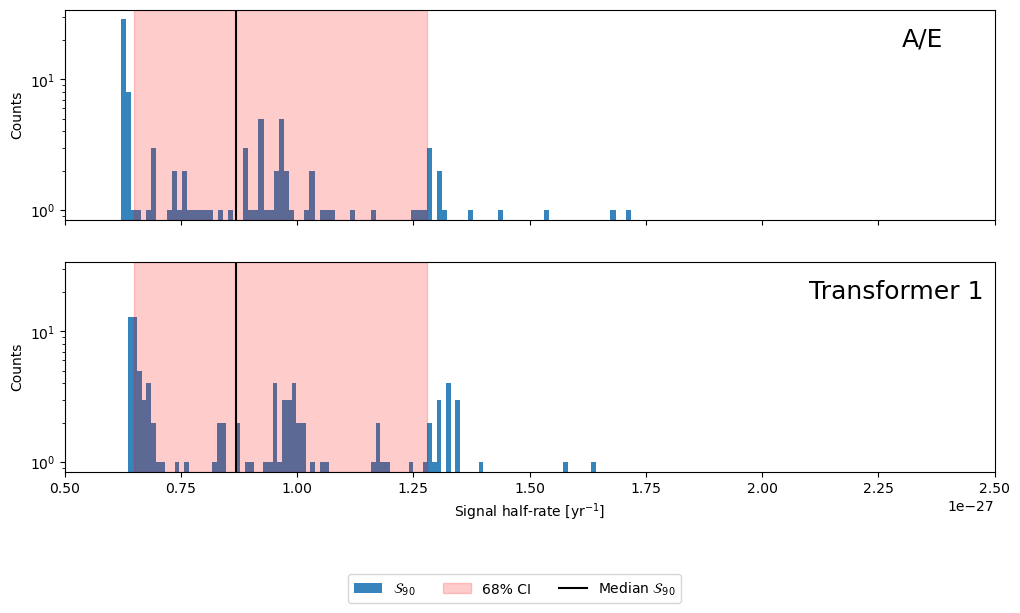

In [70]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,6))

for i, key in enumerate(data.keys()):

    
    ax[i].hist(data[key]['S90'], bins=100, label=r"$\mathcal{S}_{90}$", alpha=0.9)
    ax[i].axvspan(data['AoE_floating_1000kgyr_new']['summary']['S90']['low'], 
                  data['AoE_floating_1000kgyr_new']['summary']['S90']['high'], 
                  color='red', alpha=0.2, label=r"68% CI")
    ax[i].axvline(data['AoE_floating_1000kgyr_new']['summary']['S90']['med'], 
                  color='black', label=r"Median $\mathcal{S}_{90}$")
    ax[i].set_ylabel("Counts")
    ax[i].set_yscale("log")

ax[0].text(0.9, 0.825, "A/E", transform=ax[0].transAxes, fontsize=18)
ax[1].text(0.8, 0.825, "Transformer 1", transform=ax[1].transAxes, fontsize=18)

    # ax[i].legend()
    
# ax[0].set_title("A/E")
# ax[1].set_title("Transformer 1")
ax[1].set_xlabel(r"Signal half-rate [yr$^{-1}$]")
ax[1].set_xlim(0.5e-27, 2.5e-27)


# fig.suptitle(r"Distribution of $S_{90}$")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# plt.tight_layout()
# if save_figures:
#     plt.savefig("Plots_pres/Results_S_histogram_1000kgyr.png", dpi=600, bbox_inches='tight')

# fig.legend()
plt.show()

### Plots - Only for A/E

In [15]:
# Initialize collectors
energies_all = []
efficiencies_all = []
n_events = []
global_s = []

# Loop over shared keys (e.g., '0', '1', ...)
for key in results_aoe:
    # --- From events_dict ---
    events = events_aoe[key]['events']
    energies = [e['energy'] for e in events]
    energies_all.extend(energies)
    n_events.append(len(energies))

    # --- From results_dict ---
    glob_s = results_aoe[key]['global_modes']['S']
    global_s.append(glob_s)

    # Grab efficiency confidence intervals (example: ci_68)
    eff_ci = results_aoe[key]['ci_68']['ε'][0][0]  # [[{left, right}]]
    efficiencies_all.append((eff_ci['left'], eff_ci['right']))


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# --- Define central energy ---
Q_bb = 2039  # keV

# --- Extract relevant data ---
roi_counts = []     # Number of events in ROI per dataset
global_s = []       # Corresponding best-fit S values
s_value_left = []
s_value_right = []

for key in results_aoe:
    events = events_aoe[key]['events']
    s_value = results_aoe[key]['global_modes']['S'] * 1e-27

    for ele in results_aoe[key]['ci_68']['S']:
        s_value_left.append(ele['left'])
        s_value_right.append(ele['right'])
    
    # Get energy resolution (standard deviation)
    omega = results_aoe[key]['global_modes']['ω'][0]  # this is σ
    fwhm = 2.355 * omega  # Convert to FWHM

    # Define ROI bounds using FWHM
    roi_low = Q_bb - fwhm
    roi_high = Q_bb + fwhm

    # Extract energies and count those within ROI
    energies = [e['energy'] for e in events]
    count_in_roi = sum(roi_low <= e <= roi_high for e in energies)
    
    roi_counts.append(count_in_roi)
    global_s.append(s_value)


In [9]:
for mean, unc in zip(global_s, s_value_left):
    if mean + unc < 0:
        print(mean - unc)

In [10]:
threshold = 1e-27  # yr⁻¹
matching_keys = []

for key in results_aoe:
    s_scaled = results_aoe[key]['global_modes']['S'] * 1e-27
    if s_scaled > threshold:
        matching_keys.append(key)


In [11]:
q = []
for key in matching_keys:
    for ele in events_aoe[key]['events']:
        q.append(ele['energy'])


(array([115., 141., 124., 107., 232., 128.,  74.,  94., 126., 115.]),
 array([1930.08945668, 1956.07378336, 1982.05811003, 2008.04243671,
        2034.02676339, 2060.01109006, 2085.99541674, 2111.97974342,
        2137.96407009, 2163.94839677, 2189.93272345]),
 <BarContainer object of 10 artists>)

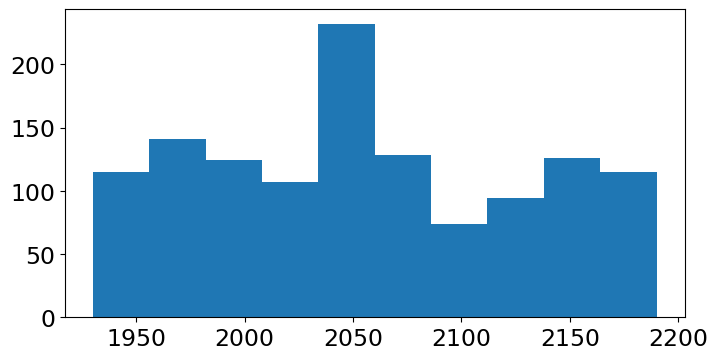

In [12]:
plt.hist(q)

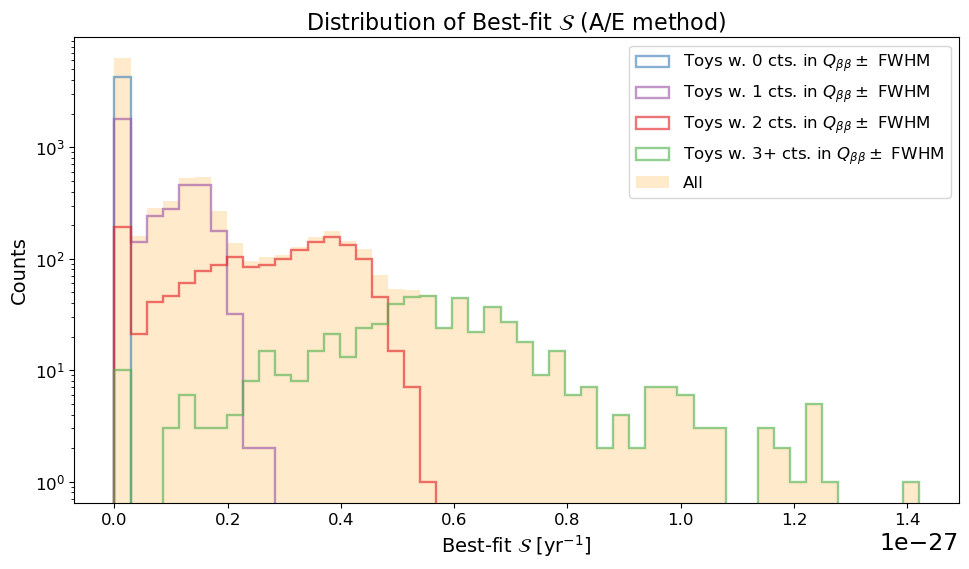

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# --- ROI categorization: 0, 1, 2, 3+ ---
def categorize_roi(c):
    if c == 0:
        return '0'
    elif c == 1:
        return '1'
    elif c == 2:
        return '2'
    else:
        return '3+'

# Categorize each sample
categories = [categorize_roi(c) for c in roi_counts]

# Organize data by category
s_groups = {
    '0': [],
    '1': [],
    '2': [],
    '3+': [],
    'All': global_s
}

for s, cat in zip(global_s, categories):
    s_groups[cat].append(s)

# --- Bin edges based on full distribution ---
bins = np.histogram_bin_edges(global_s, bins=50)

# --- Define colors (colorblind-friendly) ---
colors = {
    '0': '#377eb8',    # blue
    '1': '#984ea3',    # purple
    '2': '#e41a1c',    # red
    '3+': '#4daf4a',   # green
    'All': "#ff9900"
}

# --- Plot ---
plt.figure(figsize=(10, 6))

for label in ['0', '1', '2', '3+', 'All']:
    plt.hist(
        s_groups[label],
        bins=bins,
        alpha=0.6 if label != 'All' else 0.2,
        label=rf"Toys w. {label} cts. in $Q_{{\beta \beta}} \pm $ FWHM" if label != 'All' else 'All',
        color=colors[label],
        histtype='step' if label != 'All' else 'stepfilled',
        linewidth=1.7
    )

# --- Axis labels and formatting ---
plt.xlabel(r"Best-fit $\mathcal{S}$ [yr$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# --- Grid ---
# plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# --- Legend ---
plt.legend(
    # title=r"$Q_{\beta\beta} \pm 4$ keV Event Count",
    fontsize=12,
    title_fontsize=13,
    loc='upper right'
)

# --- Title ---
plt.title(r"Distribution of Best-fit $\mathcal{S}$ (A/E method)", fontsize=16)

# --- Layout and display ---
plt.tight_layout()
if save_figures:
    plt.savefig("Plots_pres/Signal_fits_per_ROIcount.png", dpi=600)
plt.show()


## General plots

In [14]:
for results in [results_aoe, results_t1]:
    upper_lim_S_90 = []
    upper_lim_B_90 = []


    for i, res in enumerate(results.values()):
        upper_lim_S_90.append(res['quantile90']['S'])
        upper_lim_B_90.append(res['refined_global_modes']['B_l200a_all'])

    results['ci_upper_S'] = np.array(upper_lim_S_90)
    results['ci_upper_B'] = np.array(upper_lim_B_90)



summary = {}
for name, res_ in zip(["AoE", "T1"], [results_aoe['ci_upper_S'], results_t1['ci_upper_S']]):
    summary[name] = {}

    # Rescale S already
    S_90 = res_*1e-27
    summary[name]['S90'] = S_90
    summary[name]['S_low'] = np.percentile(S_90, 16)
    summary[name]['S_med'] = np.percentile(S_90, 50)  # Median (optional)
    summary[name]['S_high'] = np.percentile(S_90, 84)

    summary[name]['T_high'] = 1/summary[name]['S_low']
    summary[name]['T_med'] = 1/summary[name]['S_med']
    summary[name]['T_low'] = 1/summary[name]['S_high']


In [15]:
# Print summary
for k,v in summary.items():

    print(f"Results for {k}: ")
    print(f"S = {v['S_med']}")
    print(f"68% BI around +{v['S_high'] - v['S_med']} - {v['S_med'] - v['S_low']}\n")

    print(f"The half-life sensitivity T_1/2  = {v['T_med']}")
    print(f"68% BI around +{v['T_high'] - v['T_med']} - {v['T_med'] - v['T_low']}\n")


# print(f"T1 cut: S = {S_t1['med']*1e-27}\n")

# print(f"A/E cut: 68% CI is in [{1/(S_aoe['low']*1)}, {1/(S_aoe['high']*1e-27)}]")
# print(f"Therefore: T_12 = {1/(S_aoe['med']*1e-27)} + {1/(S_aoe['med']*1e-27) - 1/(S_aoe['high']*1e-27)} - {1/(S_aoe['med']*1e-27) - 1/(S_aoe['low']*1e-27)} \n")

# # print(f"T1 cut: T_12 = {1/(S_t1['med']*1e-27)}")
# print(f"T1 cut: 68% CI is in [{1/(S_t1['low']*1e-27)}, {1/(S_t1['high']*1e-27)}]")


Results for AoE: 
S = 8.228078714008182e-28
68% BI around +3.649385269547104e-28 - 1.7585493995186068e-28

The half-life sensitivity T_1/2  = 1.2153505511529864e+27
68% BI around +3.30356951493822e+26 - 3.734199829908512e+26

Results for T1: 
S = 7.996867080906368e-28
68% BI around +3.416877506801717e-28 - 1.7081825899262507e-28

The half-life sensitivity T_1/2  = 1.2504897103862576e+27
68% BI around +3.396679790864829e+26 - 3.743530557453786e+26



In [16]:
np.round(3.396679790864829, 2)

np.float64(3.4)

In [17]:
np.round(1.215170207676, 3)

np.float64(1.215)

In [18]:
np.round(v['S_med']*1e28, 3)

np.float64(7.997)

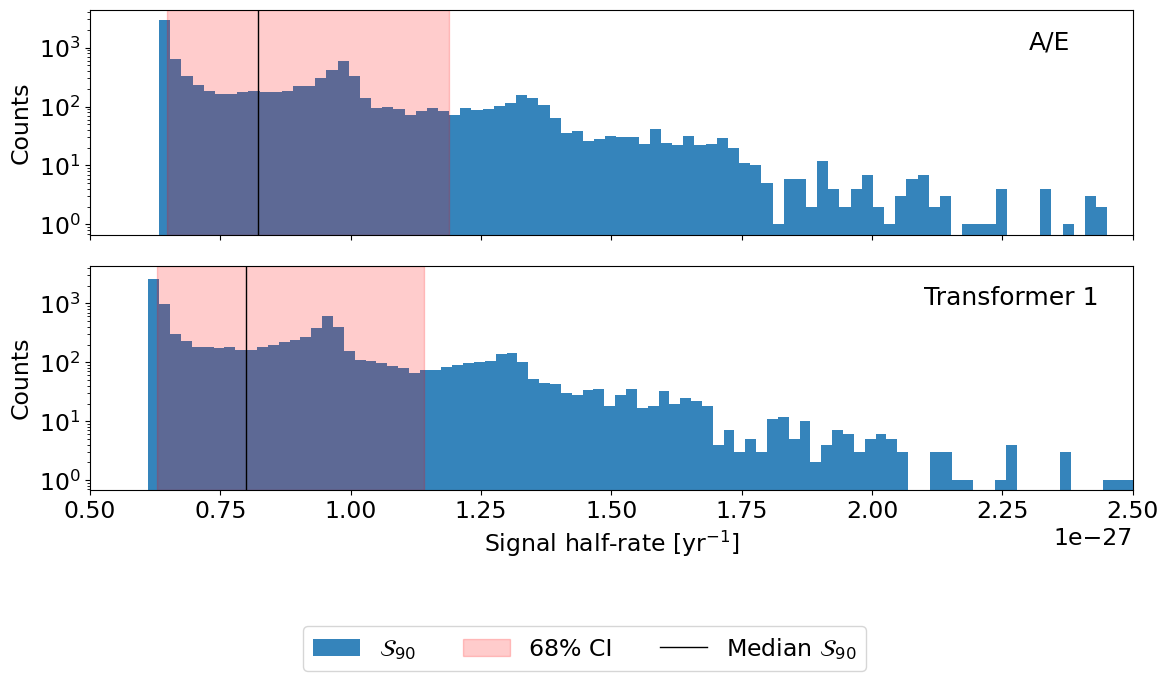

In [30]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,6))

for i, v in enumerate(summary.values()):
    
    ax[i].hist(v['S90'], bins=100, label=r"$\mathcal{S}_{90}$", alpha=0.9)
    ax[i].axvspan(v['S_low'], v['S_high'], color='red', alpha=0.2, label=r"68% CI")
    ax[i].axvline(v['S_med'], color='black', label=r"Median $\mathcal{S}_{90}$")
    ax[i].set_ylabel("Counts")
    ax[i].set_yscale("log")

ax[0].text(0.9, 0.825, "A/E", transform=ax[0].transAxes, fontsize=18)
ax[1].text(0.8, 0.825, "Transformer 1", transform=ax[1].transAxes, fontsize=18)

    # ax[i].legend()
    
# ax[0].set_title("A/E")
# ax[1].set_title("Transformer 1")
ax[1].set_xlabel(r"Signal half-rate [yr$^{-1}$]")
ax[1].set_xlim(0.5e-27, 2.5e-27)


# fig.suptitle(r"Distribution of $S_{90}$")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
if save_figures:
    plt.savefig("Plots_pres/Results_S_histogram_1000kgyr.png", dpi=600, bbox_inches='tight')

# fig.legend()
plt.show()

In [27]:
# fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,6))

# for i, v in enumerate(summary.values()):
    
#     ax[i].hist(v['S90'], bins=100, label=r"$S_{1/2}$", alpha=0.9)
#     ax[i].axvspan(v['S_low'], v['S_high'], color='red', alpha=0.2, label=r"68% CI")
#     ax[i].axvline(v['S_med'], color='black', label=r"Median $T_{90}$")
#     ax[i].set_ylabel("Counts")
#     ax[i].set_yscale("log")

# ax[0].text(0.9, 0.825, "A/E", transform=ax[0].transAxes, fontsize=18)
# ax[1].text(0.8, 0.825, "Transformer 1", transform=ax[1].transAxes, fontsize=18)

#     # ax[i].legend()
    
# # ax[0].set_title("A/E")
# # ax[1].set_title("Transformer 1")
# ax[1].set_xlabel(r"Signal half-rate [yr$^{-1}$]")
# ax[1].set_xlim(0.5e-27, 2.5e-27)


# # fig.suptitle(r"Distribution of $S_{90}$")

# handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# plt.tight_layout()
# if save_figures:
#     plt.savefig("Plots_pres/Results_S_histogram_1000kgyr.png", dpi=600, bbox_inches='tight')

# # fig.legend()
# plt.show()

### Lets look at MCMC output

In [21]:
summary = {}
for name, res_ in zip(["AoE", "T1"], [results_aoe['ci_upper_S'], results_t1['ci_upper_S']]):
    summary[name] = {}

    # Rescale S already
    S_90 = res_*1e-27
    summary[name]['S90'] = S_90
    summary[name]['S_low'] = np.percentile(S_90, 16)
    summary[name]['S_med'] = np.percentile(S_90, 50)  # Median (optional)
    summary[name]['S_high'] = np.percentile(S_90, 84)

    summary[name]['T_high'] = 1/summary[name]['S_low']
    summary[name]['T_med'] = 1/summary[name]['S_med']
    summary[name]['T_low'] = 1/summary[name]['S_high']


In [22]:


for name, results in zip(["AoE", "T1"], [results_aoe, results_t1]):

    S_list = []
    B_list = []

    for k,v in results.items():
        try:
            S_list.append(v['global_modes']['S']*1e-27)
            B_list.append(v['global_modes']['B_l200a_all']*1e4)
        except:
            pass

    summary[name]['S_list'] = S_list
    summary[name]['B_list'] = B_list


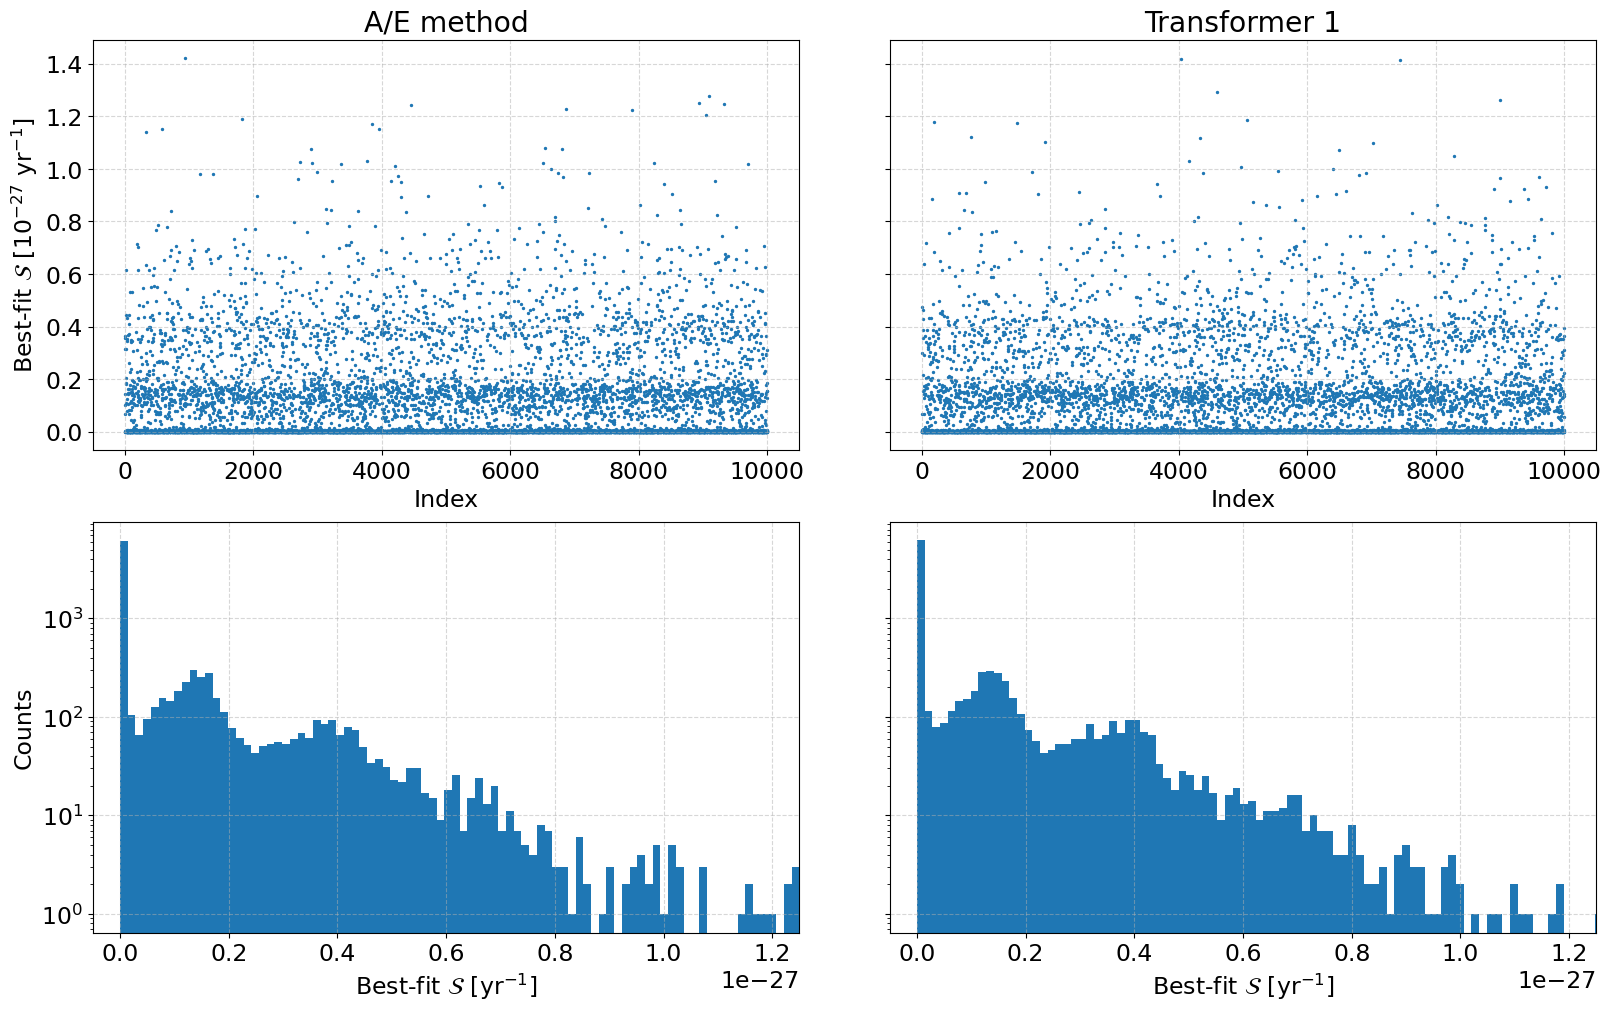

In [31]:
x = np.arange(1, len(S_list) + 1)

# Set up figure and axes (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey="row", gridspec_kw={'wspace': 0.1}, constrained_layout=True)

for idx, key in enumerate(['AoE', 'T1']):
    # Scatter plot on top row
    axes[0, idx].scatter(x, np.array(summary[key]['S_list'])*1e27, s=2)
    # axes[0, idx].set_title(f'Signal half-rate per toy ({key})')
    axes[0, idx].set_xlabel('Index')
    axes[0, 0].set_ylabel(r'Best-fit $\mathcal{S}$ [$10^{-27}$ yr$^{-1}$]')
    if 'T' in key:
        axes[0, idx].set_title(f'Transformer 1')
    else:
        axes[0, idx].set_title(f'A/E method')



    # Histogram on bottom row
    axes[1, idx].hist(summary[key]['S_list'], bins=100)
    axes[1, idx].set_xlabel(r'Best-fit $\mathcal{S}$ [yr$^{-1}$]')
    axes[1, 0].set_ylabel('Counts')
    axes[1, idx].set_xlim(-0.05e-27, 1.25e-27)
    axes[1, idx].set_yscale('log')

    axes[0, idx].grid(True, linestyle='--', alpha=0.5)
    axes[1, idx].grid(True, linestyle='--', alpha=0.5)


# plt.tight_layout()
if save_figures:
    plt.savefig("Plots_pres/signal_fit_per_toy_1000kgyr.pdf", dpi=500)
plt.show()


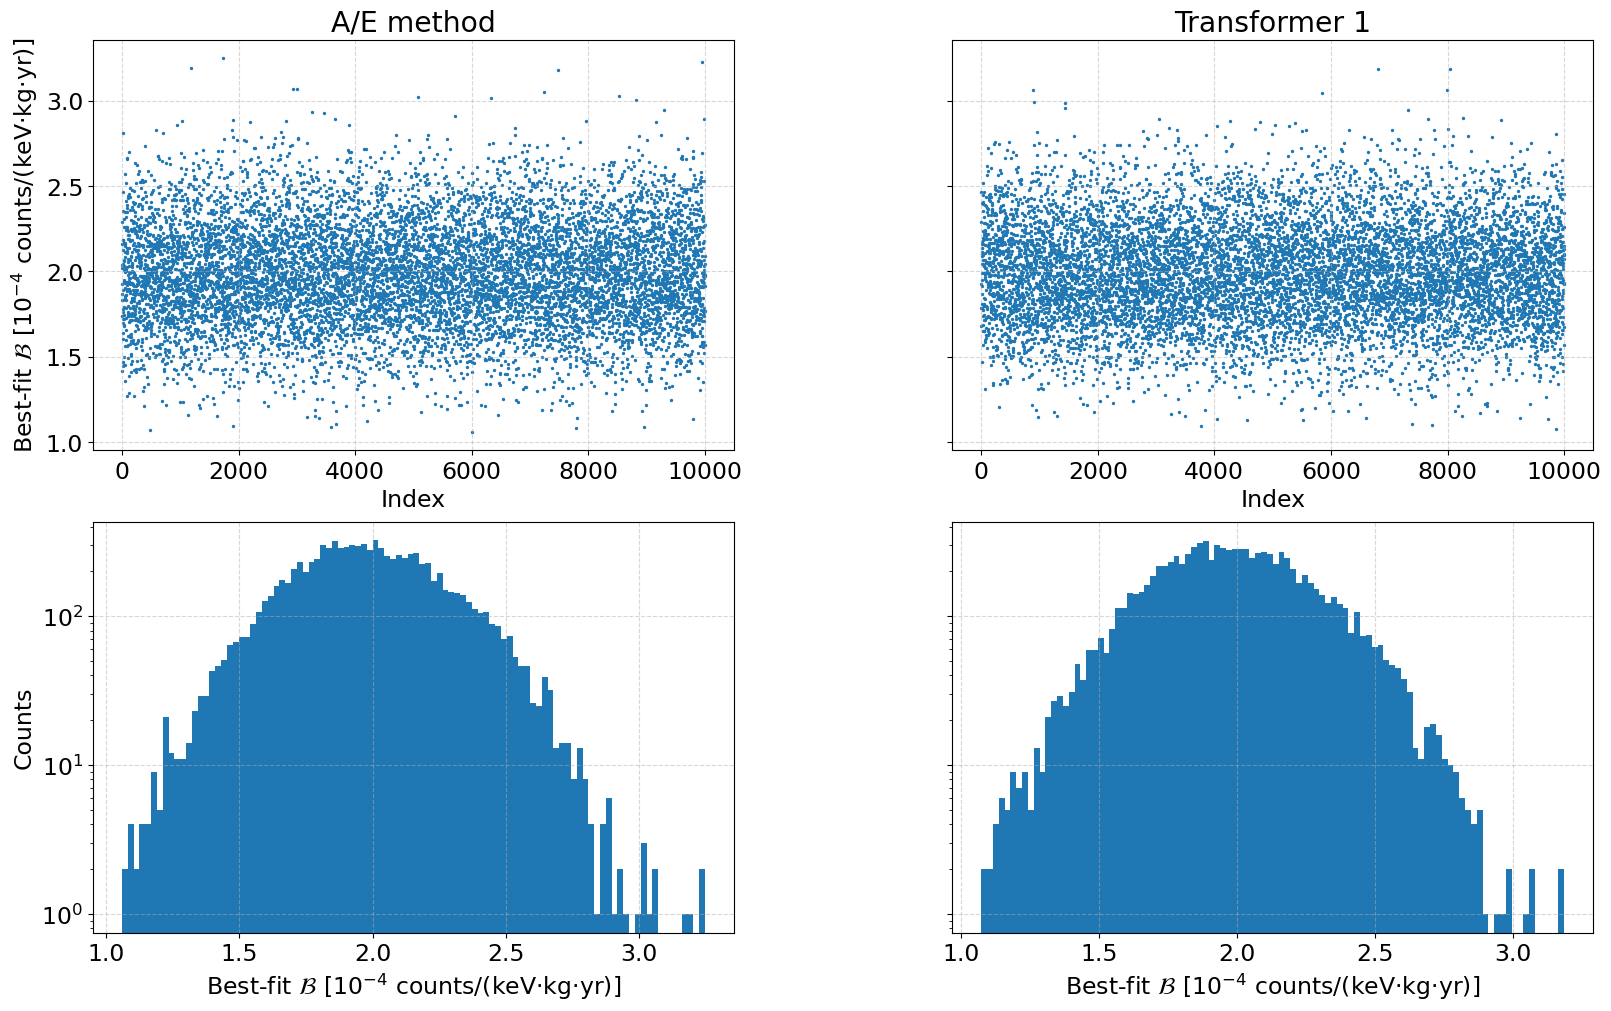

In [24]:
x = np.arange(1, len(B_list) + 1)

# Set up figure and axes (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey="row", gridspec_kw={'wspace': 0.25}, constrained_layout=True)

for idx, key in enumerate(['AoE', 'T1']):
    # Scatter plot on top row
    axes[0, idx].scatter(x, np.array(summary[key]['B_list']), s=2)
    axes[0, idx].set_xlabel('Index')
    axes[0, 0].set_ylabel(r'Best-fit $\mathcal{B}$ [$10^{-4}$ counts/(keV$\cdot$kg$\cdot$yr)]')
    if 'T' in key:
        axes[0, idx].set_title(f'Transformer 1')
    else:
        axes[0, idx].set_title(f'A/E method')


    # Histogram on bottom row
    axes[1, idx].hist(summary[key]['B_list'], bins=100)
    axes[1, idx].set_xlabel(r'Best-fit $\mathcal{B}$ [$10^{-4}$ counts/(keV$\cdot$kg$\cdot$yr)]')
    axes[1, 0].set_ylabel('Counts')
    axes[1, idx].set_yscale('log')

    axes[0, idx].grid(True, linestyle='--', alpha=0.5)
    axes[1, idx].grid(True, linestyle='--', alpha=0.5)


# plt.tight_layout()
if save_figures:
    plt.savefig("Plots_pres/bkg_fit_per_toy_1000kgyr.png", dpi=600)
plt.show()


## Other plots - test

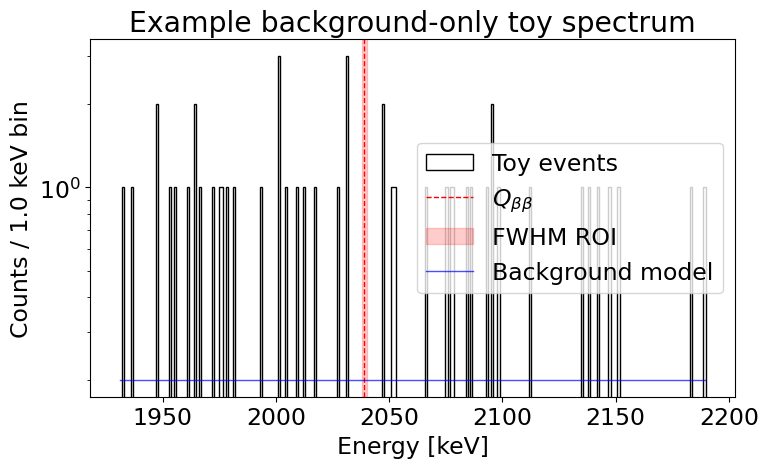

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

# === Load your JSON fit result file ===

# --- Extract event energies ---
events = events_aoe['0']['events']
energies = np.array([ev["energy"] for ev in events])

# --- Parameters from the fit config ---
B_input = 2e-4  # ckky (from your text)
exposure_kgyr = 1000  # assumed exposure
roi_center = 2039.0   # keV, Qbb for Ge-76
fwhm = 2.355 * results_aoe['0']['nuisance_info']['ω'][0]['prior_mu']  # keV

# --- Histogram settings ---
bin_width = 1.0  # keV
bins = np.arange(min(energies) - bin_width,
                 max(energies) + bin_width,
                 bin_width)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8,5))

# Histogram of event energies
counts, bin_edges, _ = ax.hist(energies, bins=bins, histtype='step', color='black', label='Toy events')

# ROI markers
ax.axvline(roi_center, color='red', linestyle='--', label=r"$Q_{\beta\beta}$")
ax.axvspan(roi_center - fwhm/2, roi_center + fwhm/2, alpha=0.2, color='red', label='FWHM ROI')

# Optional: overlay flat background model
E_mid = 0.5*(bin_edges[1:] + bin_edges[:-1])
bkg_counts = np.ones_like(E_mid) * B_input * exposure_kgyr * bin_width
ax.plot(E_mid, bkg_counts, color='blue', linestyle='-', alpha=0.7, label='Background model')

# Labels and legend
ax.set_xlabel("Energy [keV]")
ax.set_ylabel(f"Counts / {bin_width:.1f} keV bin")
ax.set_title("Example background-only toy spectrum")
ax.legend()
ax.set_yscale('log')

plt.tight_layout()
plt.show()
